<a href="https://colab.research.google.com/github/upeast/Lee2/blob/main/11%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# TensorFlow 1.x 스타일로 CNN (conv1 → conv2 → FC1) 전체 구현
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [29]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

In [30]:
# 1. 데이터 로딩 및 전처리
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x = train_x.reshape((-1, 28, 28, 1))
test_x = test_x.reshape((-1, 28, 28, 1))
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

In [31]:
# 2. 하이퍼파라미터 및 shape 설정
input_h, input_w, input_ch = 28, 28, 1
k1_h, k1_w, k1_ch = 3, 3, 32
p1_h, p1_w = 2, 2
k2_h, k2_w, k2_ch = 3, 3, 64
p2_h, p2_w = 2, 2
conv_result_size = 7 * 7 * 64
n_hidden = 100
n_output = 10
LR = 0.0001


In [32]:

# 3. 플레이스홀더
x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch])
y = tf.placeholder(tf.float32, [None, n_output])

In [33]:

# 4. 가중치 및 바이어스
weights = {
    'conv1': tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev=0.1)),
    'hidden': tf.Variable(tf.random.normal([conv_result_size, n_hidden], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.1))
}

biases = {
    'conv1': tf.Variable(tf.random.normal([k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_ch], stddev=0.1)),
    'hidden': tf.Variable(tf.random.normal([n_hidden], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_output], stddev=0.1))
}



In [34]:


# 5. CNN 네트워크 정의
def net(x, weights, biases):
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1, 1, 1, 1], padding='SAME')
    conv1 = tf.nn.relu(conv1 + biases['conv1'])
    maxp1 = tf.nn.max_pool(conv1, ksize=[1, p1_h, p1_w, 1], strides=[1, p1_h, p1_w, 1], padding='VALID')

    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1, 1, 1, 1], padding='SAME')
    conv2 = tf.nn.relu(conv2 + biases['conv2'])
    maxp2 = tf.nn.max_pool(conv2, ksize=[1, p2_h, p2_w, 1], strides=[1, p2_h, p2_w, 1], padding='VALID')

    flat = tf.reshape(maxp2, [-1, conv_result_size])
    hidden = tf.nn.relu(tf.matmul(flat, weights['hidden']) + biases['hidden'])
    output = tf.matmul(hidden, weights['output']) + biases['output']
    return output

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Iter: 0
Train Loss: 3.0520
Test Loss:  2.9099
Iter: 250
Train Loss: 0.5147
Test Loss:  0.7312
Iter: 500
Train Loss: 0.4956
Test Loss:  0.3354
Iter: 750
Train Loss: 0.1425
Test Loss:  0.1525
Iter: 1000
Train Loss: 0.1198
Test Loss:  0.1725
Iter: 1250
Train Loss: 0.0867
Test Loss:  0.1070
Iter: 1500
Train Loss: 0.0826
Test Loss:  0.1699
Iter: 1750
Train Loss: 0.0911
Test Loss:  0.0583
Iter: 2000
Train Loss: 0.2096
Test Loss:  0.2717
Iter: 2250
Train Loss: 0.1101
Test Loss:  0.0986


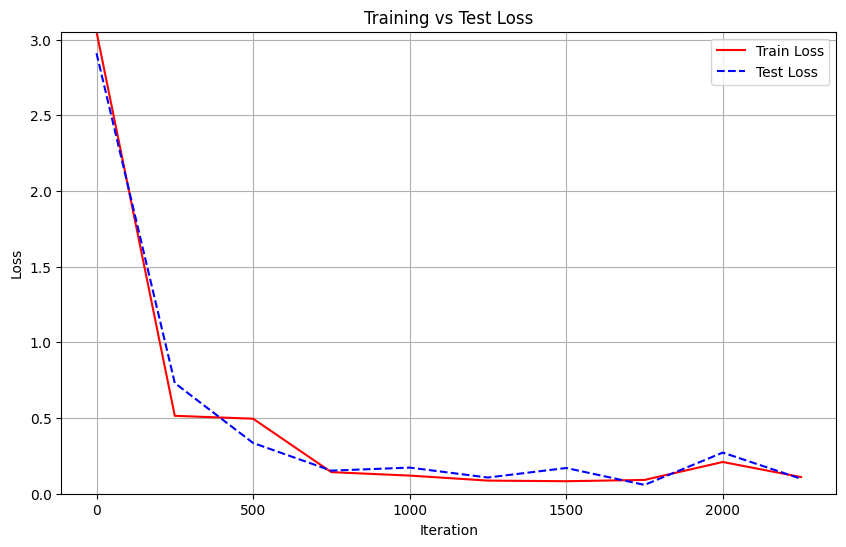

In [22]:

# 6. 손실 함수 및 옵티마이저 정의
pred = net(x, weights, biases)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

# 7. 학습
n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []

for epoch in range(n_iter):
    idx = np.random.choice(train_x.shape[0], n_batch, replace=False)
    batch_x = train_x[idx]
    batch_y = train_y[idx]

    sess.run(optm, feed_dict={x: batch_x, y: batch_y})

    if epoch % n_prt == 0:
        test_idx = np.random.choice(test_x.shape[0], n_batch, replace=False)
        test_batch_x = test_x[test_idx]
        test_batch_y = test_y[test_idx]

        train_loss = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        test_loss = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(train_loss)
        loss_record_test.append(test_loss)

        print(f"Iter: {epoch}")
        print(f"Train Loss: {train_loss:.4f}")
        print(f"Test Loss:  {test_loss:.4f}")

# 8. 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(loss_record_train)) * n_prt, loss_record_train, 'r-', label='Train Loss')
plt.plot(np.arange(len(loss_record_test)) * n_prt, loss_record_test, 'b--', label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training vs Test Loss')
plt.legend()
plt.grid(True)
plt.ylim([0, np.max(loss_record_train)])
plt.show()



[Iter 0] Test Accuracy: 0.1200, Loss: 2.7066
[Iter 250] Test Accuracy: 0.9400, Loss: 0.3354
[Iter 500] Test Accuracy: 0.8800, Loss: 0.3608
[Iter 750] Test Accuracy: 0.9600, Loss: 0.1620
[Iter 1000] Test Accuracy: 0.9600, Loss: 0.1541
[Iter 1250] Test Accuracy: 0.9800, Loss: 0.0399
[Iter 1500] Test Accuracy: 0.9800, Loss: 0.0510
[Iter 1750] Test Accuracy: 0.9800, Loss: 0.0755
[Iter 2000] Test Accuracy: 0.9600, Loss: 0.0957
[Iter 2250] Test Accuracy: 0.9600, Loss: 0.0781


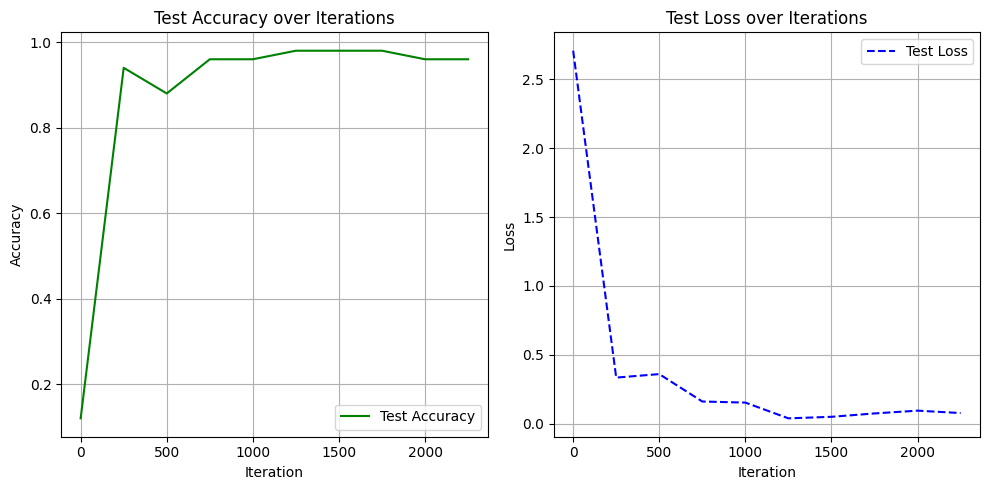

In [2]:
# TensorFlow 1.x 스타일 CNN (conv1 → conv2 → conv3 → FC1 → FC2)
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. 데이터 로딩 및 전처리
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x = train_x.reshape((-1, 28, 28, 1))
test_x = test_x.reshape((-1, 28, 28, 1))
train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

# 2. 하이퍼파라미터 및 shape 설정
input_h, input_w, input_ch = 28, 28, 1
k1_ch, k2_ch, k3_ch = 32, 64, 128
conv_result_size = 3 * 3 * 128  # 중요: 최종 feature map 크기 반영
n_hidden = 128
n_output = 10
LR = 0.0001

# 3. 플레이스홀더
x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch])
y = tf.placeholder(tf.float32, [None, n_output])

# 4. 가중치 및 바이어스 정의
weights = {
    'conv1': tf.Variable(tf.random.normal([3, 3, input_ch, k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([3, 3, k1_ch, k2_ch], stddev=0.1)),
    'conv3': tf.Variable(tf.random.normal([3, 3, k2_ch, k3_ch], stddev=0.1)),
    'fc1': tf.Variable(tf.random.normal([conv_result_size, n_hidden], stddev=0.1)),
    'fc2': tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.1))
}

biases = {
    'conv1': tf.Variable(tf.random.normal([k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_ch], stddev=0.1)),
    'conv3': tf.Variable(tf.random.normal([k3_ch], stddev=0.1)),
    'fc1': tf.Variable(tf.random.normal([n_hidden], stddev=0.1)),
    'fc2': tf.Variable(tf.random.normal([n_output], stddev=0.1))
}

# 5. CNN 모델 정의
def net(x, weights, biases):
    conv1 = tf.nn.relu(tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME') + biases['conv1'])
    pool1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    conv2 = tf.nn.relu(tf.nn.conv2d(pool1, weights['conv2'], strides=[1,1,1,1], padding='SAME') + biases['conv2'])
    pool2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    conv3 = tf.nn.relu(tf.nn.conv2d(pool2, weights['conv3'], strides=[1,1,1,1], padding='SAME') + biases['conv3'])
    pool3 = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    flat = tf.reshape(pool3, [-1, conv_result_size])
    fc1 = tf.nn.relu(tf.matmul(flat, weights['fc1']) + biases['fc1'])
    output = tf.matmul(fc1, weights['fc2']) + biases['fc2']
    return output

# 6. 손실 함수 및 옵티마이저
pred = net(x, weights, biases)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

# 7. 정확도 평가 지표
correct = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(correct, tf.float32))

# 8. 학습
n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

acc_record = []
loss_record = []

for epoch in range(n_iter):
    idx = np.random.choice(train_x.shape[0], n_batch, replace=False)
    batch_x = train_x[idx]
    batch_y = train_y[idx]
    sess.run(optm, feed_dict={x: batch_x, y: batch_y})

    if epoch % n_prt == 0:
        test_idx = np.random.choice(test_x.shape[0], n_batch, replace=False)
        test_batch_x = test_x[test_idx]
        test_batch_y = test_y[test_idx]

        test_acc = sess.run(acc, feed_dict={x: test_batch_x, y: test_batch_y})
        test_loss = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        acc_record.append(test_acc)
        loss_record.append(test_loss)

        print(f"[Iter {epoch}] Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

# 9. 성능 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(acc_record)) * n_prt, acc_record, 'g-', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Iterations')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(loss_record)) * n_prt, loss_record, 'b--', label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Test Loss over Iterations')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
